In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [3]:
df = load_iris()

In [4]:
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
pd_iris = pd.DataFrame(df['data'], columns=df['feature_names'])

In [6]:
pd_iris['target'] = df['target']

# заменяем значение target 2 на 1
pd_iris['target'] = pd_iris['target'].apply(lambda x: 1 if x == 2 else x)
pd_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
corr = pd_iris.corr()

<Axes: >

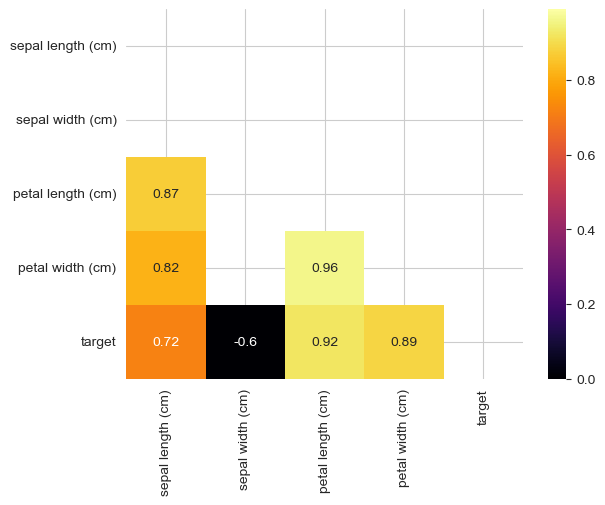

In [8]:
# строим тепловую карту, чтобы изучить зависимости
sns.heatmap(corr[(abs(corr)>0.5) ],
            vmax=0.99,
            vmin=0.0,
            annot=True,
            cmap='inferno',
            mask=np.triu(corr)
            )

In [24]:
# в параметры берем признаки без petal width, т.к. он высоко кореллирует с petal lengh и меньше с целевой
X = pd_iris.iloc[:,:3]
X

,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [26]:
y = pd_iris['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: target, Length: 150, dtype: int64

In [27]:
y.value_counts()

1    100
0     50
Name: target, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
test_predictions = model.predict(X_test)
test_predictions

array([-0.19339285, -0.13610456,  0.06444109,  1.08641316,  0.77719483,
        0.99750179,  1.03106794,  0.92735391,  1.0725765 ,  0.14740567,
        0.98318767, -0.12423313,  0.03923261,  1.3269603 ,  0.93478705,
        0.79250676,  0.76931462,  0.81277733,  0.10445223,  1.20843253,
        0.85276774, -0.02990638,  0.95058751,  0.74755771,  0.80535527,
        0.67100631,  0.7865807 ,  1.05383373,  0.19037984,  0.32471773,
        1.13138294,  0.87697841,  1.0572853 ,  0.78263094,  1.03801254,
        0.91206272,  0.82165535,  0.77474107,  0.86957708,  1.12838953,
       -0.01705787, -0.08324491,  0.15927711,  0.92094073,  0.86811147])

In [33]:
test_predictions = np.vectorize(lambda x: 1 if x > 0.5 else 0)(test_predictions)
test_predictions

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1])

In [41]:
y_test

33     0
16     0
43     0
129    1
50     1
123    1
68     1
53     1
146    1
1      0
147    1
32     0
31     0
122    1
127    1
74     1
88     1
96     1
42     0
134    1
80     1
48     0
90     1
65     1
97     1
64     1
93     1
114    1
25     0
41     0
104    1
89     1
116    1
82     1
112    1
55     1
86     1
61     1
94     1
135    1
21     0
22     0
29     0
77     1
66     1
Name: target, dtype: int64

In [35]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [36]:
MSE

0.0

In [37]:
RMSE

0.0

In [38]:
MAE

0.0